# UNDERSTANDING SENTIMENTS IN EPINIONS

In this project, we are analysing customer reviews for Fuji Digital Camera obtained from Epinions data.com. Given data consists 50% of the reviews about Digital Cameras and remining 50% is about Automobiles. We first identify the reviews for Fuji Digital Cameras and then select a classifier that helps us best perform sentiment analysis.

For every record in given data, we are considering the review "TEXT" (contains review) and "Label" (“Yes” means that a consumer recommends that product and “No” denotes the opposite).

## Index
- [Libraries](#Libraries)
- [Data Loading](#Data-Loading)
    - [Identify Fuji Reviews](#Identify-Fuji-Reviews)
    - [Data Exploration](#Data-Exploration)
- [Data Cleaning](#Data-Cleaning)
- [Feature Construction](#Feature-Construction)
- [Feature Extraction/Selection](#Feature-Extraction/Selection)
- [Data Processing](#Data-Processing)
    - [Feature Analysis](#Feature-Analysis)
- [Modelling](#Modelling)
    - [Metric Calculation](#Metric-Calculation)
    - [Model Training](#Model-Training)
    - [Model Selection](#Model-Selection)
- [Evaluating Model Performance](#Evaluating-Model-Performance)
- [Result](#Result)

## Libraries

This project has been developed using Python 2.7. Following libraries are loaded for Data processing, Data visualization and Data Modelling.

In [3]:
# Load required libraries 
import pandas as pd
import numpy as np
import os
import nltk
from nltk.corpus import stopwords
import string
from string import digits
import re
import sklearn
from collections import Counter
from bs4 import BeautifulSoup

In [4]:
# Libraries & parameters used for visualization
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
colors = ['cobalt', 'orangey yellow', 'steel grey', 'tomato', 'dark lilac', 'bluish green']
cmap = sns.xkcd_palette(colors)
import matplotlib.pyplot as plt

## Data Loading

In this secion, we will load the data downloaded from epinions.com. The data consists of more than 10,000 reviews about Camera/Automobiles. We will extract reviews related to Fuji Digital Cameras and explore data using visualization techniques.

In [5]:
# Set path of the epinions file
filepath = os.path.join('..\Datasets\D1.txt')

In [6]:
# Load data from file
with open(filepath) as myfile:
    data = myfile.read()

In [7]:
# Using BeautifulSoup to parse the data
soup = BeautifulSoup(data, 'lxml')

In [8]:
print soup.prettify()[:199]

<html>
 <body>
  <doc>
   <docid>
    36
   </docid>
   <product>
    Digital_Cameras/Casio_QV_4000_4_0_Megapixel_Digital_Camera_EX_Plus_Outfit__Camera_QV4000EXK
   </product>
   <label>
    Yes
    


In [9]:
# Split all the documents in the file
documents = soup.find_all('doc')

In [10]:
# Total number of documents
len(documents)

12000

In [11]:
# Add the data to pandas dataframe
tab = pd.DataFrame()

for idx, doc in enumerate(documents):
    tab.loc[idx,'DOCID'] = str(doc.docid.contents[0]).strip('\n').strip(' ')
    tab.loc[idx,'PRODUCT'] =  str(doc.product.contents[0]).strip('\n').strip(' ')
    tab.loc[idx,'LABEL'] =  str(doc.label.contents[0]).strip('\n').strip(' ')
    tab.loc[idx,'RATING'] =  str(doc.rating.contents[0]).strip('\n').strip(' ')
    tab.loc[idx,'URL'] =  str(doc.url.contents[0]).strip('\n').strip(' ')
    tab.loc[idx,'CLASS'] =  str(doc.find('class').contents[0]).strip('\n').strip(' ')
    tab.loc[idx,'TEXT'] =  doc.find('text').contents[0].strip('\n').strip(' ')

### Identify Fuji Reviews

In this section, we extract reviews related to Fuji Digital Cameras.

In [12]:
# Split the data into two dataframes by CLASS
auto = (tab[tab.CLASS == 'Auto'])
camera = (tab[tab.CLASS == 'Camera'])

In [13]:
# Filter reviews of Fuji Digital Cameras 
fuji_camera = camera[camera['PRODUCT'].str.contains("Fuji")]
fuji_camera.reset_index(inplace=True, drop=True)

In [14]:
# Total number of Fuji reviews
len(fuji_camera)

487

In [15]:
fuji_camera.head()

,DOCID,PRODUCT,LABEL,RATING,URL,CLASS,TEXT
0,107,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,Yes,4.0,http://www.epinions.com/elec-review-31F6-E9DA6...,Camera,[NOTE: I have the Japanese version of this cam...
1,108,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,Yes,4.0,http://www.epinions.com/elec-review-B67-D4F9A3...,Camera,"Ah, finally, A great little camera for the beg..."
2,109,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,Yes,5.0,http://www.epinions.com/elec-review-7463-6CD18...,Camera,"Okay, I've written three negative reviews in a..."
3,110,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,No,2.0,http://www.epinions.com/elec-review-2E51-6E04C...,Camera,\nThis camera is a great deal. Wal-Mart has t...
4,111,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,Yes,5.0,http://www.epinions.com/elec-review-4179-153E2...,Camera,This is a great camera. From it's picture qual...


### Data Exploration
In this section, we perform visual analysis of given data to explore the distribution of positive and negative reviews.

#### 1. Distribution of data for consumer recommending a product from Class = [Auto, Camera]

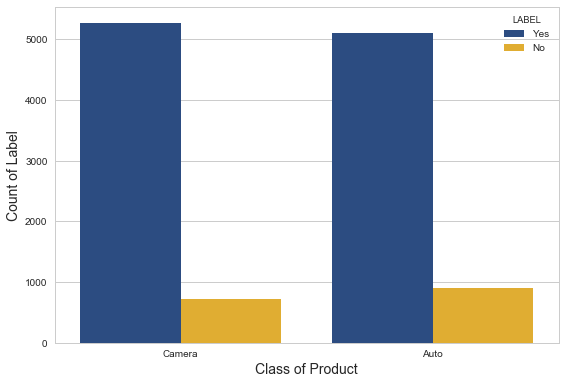

In [16]:
sns.countplot(x="CLASS", hue = "LABEL", data=tab, palette=cmap)
plt.ylabel('Count of Label', fontsize=14)
plt.xlabel('Class of Product', fontsize=14)
plt.tight_layout()

#### 2. Distribution of data for consumer ratings of products from Class = [Auto, Camera]

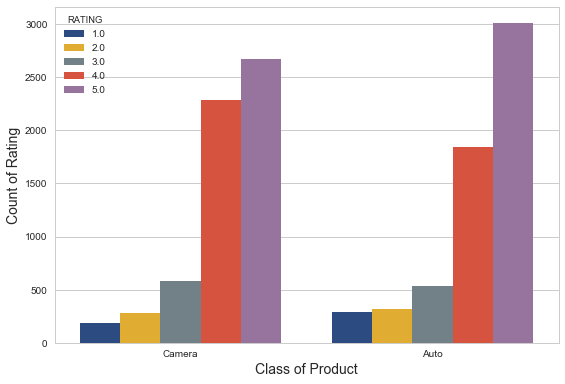

In [17]:
sns.countplot(x="CLASS", hue = "RATING", data=tab, palette = cmap)
plt.ylabel('Count of Rating', fontsize=14)
plt.xlabel('Class of Product', fontsize=14)
plt.tight_layout()

#### 3. Distribution of data for consumer ratings for Camera vs if the recommend the product or not.

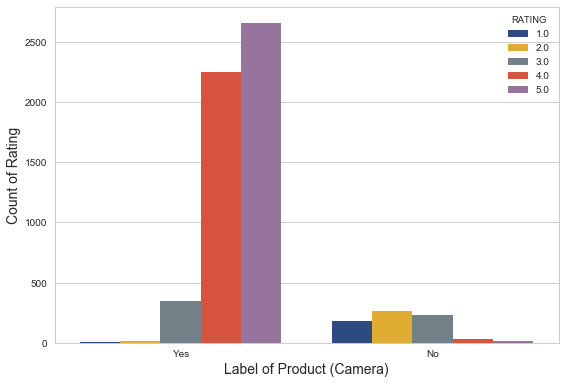

In [18]:
sns.countplot(x="LABEL", hue = "RATING", data=camera, palette = cmap)
plt.ylabel('Count of Rating', fontsize=14)
plt.xlabel('Label of Product (Camera)', fontsize=14)
plt.tight_layout()

#### 4. Distribution of data for consumer ratings for Fuji Camera vs if the recommend the product or not.

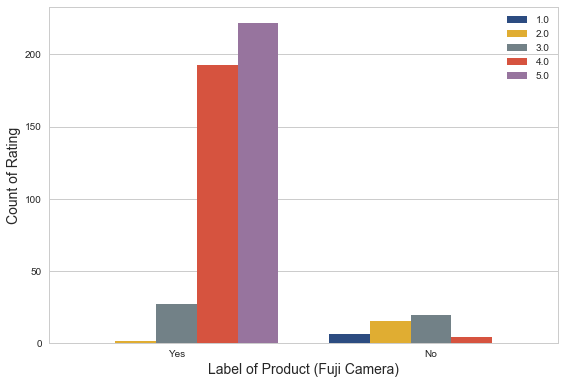

In [19]:
sns.countplot(x="LABEL", hue = "RATING", data=fuji_camera, palette = cmap)
plt.ylabel('Count of Rating', fontsize=14)
plt.xlabel('Label of Product (Fuji Camera)', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()

From the above visualizations, we can infer that the data is highly biased with about 10% data with Label "No" and the rest with Label "Yes".

## Data Cleaning

In this section, we will create functions that clean the text of every review using regular expressions and various functions offered by nltk package.

The following function processes and tokenizes raw text. We use nltk package to tokenize and clean the text. This includes removing numbers, stopwords, punctuations, converting the text to lower case and lemmatizing.

In [20]:
def process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """
    input:
        text: string of one review
        lemmatizer: default is nltk.stem.wordnet.WordNetLemmatizer()
    output:
        result: list of tokenized words
    """
    
    tokenized = []
    lemmatized = []
    
    # Remove numbers
    text = re.sub('\d', ' ', text)
    
    # Normalizes case
    text = text.lower()
    
    # remove apostrophes, delete 's
    text = text.replace('\'s', '')
    text = text.replace('\'', ' ')
    
    # Remove punctuations  
    for char in string.punctuation:
        text = text.replace(char, ' ')
        
    # Tokenize text
    tokenized = nltk.word_tokenize(text)
    
    for word in tokenized:
        # Remove stopwords
        if word not in stopwords.words('english'):
            try:
                # lemmatize word
                lemmatized.append(lemmatizer.lemmatize(word))
            except Exception:
                pass
    return ' '.join(word for word in lemmatized)

In [21]:
# Example

text = "This is a sample test input for 's processing loves."
print process(text)

sample test input processing love


The following function makes use of the process() function that we defined earlier to clean all the text in the last column of pandas dataframe. Here, we assume the last column has all the text reviews.

In [22]:
def process_all(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """
    Inputs
        df: pd.DataFrame: dataframe containing a column 'text' in last column
        lemmatizer: the default argument is of type nltk.stem.wordnet.WordNetLemmatizer
    Outputs
        pd.DataFrame: dataframe in which the values of text column have been changed from str to list(str),
                        the output from process_text() function. Other columns are unaffected.
    """
    df_copy = df.copy()
    df_length = len(df_copy.iloc[:,-1])
        
    temp = [process(df_copy.iloc[i,-1]) for i in range(df_length)]  
    df_copy.loc[:,'TEXT'] = temp
    
    return df_copy

## Feature Construction

In this section, we will create functions to create Bag-Of-Words feature vectors from the processed reviews. 

Since the number of possible words is large and not all of them may be useful for our classification task. We first determine which words to retain, and which to omit. Since we have already pruned the stopwords, we will now prune words that are used rarely and usually tend to be typos. We consider a word rare if it occurs not more than once.

Different approaches for parameterization of text:
- Binary: tells whether a term t is present in a document or not
- Counts: frequency of occurrences of term t in a document
- Weighted frequencies: TF-IDF (Term Frequency - Inverse Document Frequency)

Where each row in matrix corresponds to the document and each column corresponds to a different term. For simplicity, we only consider TF-IDF with unigrams(single words). For advanced analysis, combination of other parameterization methods with Bi-grams/N-grams will yeild interesting results for comparison.

### 1. Get Rare Words

The below function use the word count information across all reviews in data to come up with a feature list of rare words.

In [23]:
def get_rare_words(processed_data):
    """ 
    Inputs:
        processed_data: pd.DataFrame: the output of process_all() function
    Outputs:
        list(str): list of rare words, sorted alphabetically.
    """
    c = []
    [c.extend(nltk.word_tokenize(sentence)) for sentence in processed_data.TEXT]
    k = Counter(c)
    words = (Counter(el for el in k.elements() if k[el] < 2))
    wordlist = list(words.elements())
    return sorted(wordlist)

### 2. TF-IDF

Below function helps construct a sparse matrix of features for each text review with the help of sklearn.feature_extraction.text.TfidfVectorizer

In [24]:
def create_tfidf_features(processed_data):
    """ creates the feature matrix using the processed reviews
    Inputs:
        processed_data: pd.DataFrame: processed reviews containing the column 'TEXT'

    Outputs:
        sklearn.feature_extraction.text.TfidfVectorizer: the TfidfVectorizer object used
                                                we need this to tranform the test records in the same way as train records
        scipy.sparse.csr.csr_matrix: sparse bag-of-words TF-IDF feature matrix
    """
    
#     processed_data.reset_index(inplace=True, drop=True)
    
    # Call the get_rare_words function to filter rare words from the text
    rare_words = get_rare_words(processed_data)
    
    # List of stopwords
    stp_wrds = [str(words) for words in nltk.corpus.stopwords.words('english')]
    stp_wrds.extend(rare_words)
    
    # Tfidf Vectorizer object
    vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(stop_words = stp_wrds)
    
    # Sparse bag-of-words TF-IDF feature matrix
    data = processed_data['TEXT']
    tfidf_matrix = vectorizer.fit_transform(data)
    
    return (vectorizer, tfidf_matrix)

## Feature Extraction/Selection

In this section, we reduce the dimension of features which transform the data representation into a shorter, more compact, and more predictive one. 

Dimensionality Reduction Techniques are broadly classified into two types:
- Feature Extraction: All the original features are transformed into the new reduced space without deleting them but replacing the original features by a smaller representative set
    - Eg: Principal Components Analysis (PCA) and Latent semantic Analysis (LSA)

- Feature Selection: A subset of original features is selected, and only the selected features are used for training and testing the classifiers.
    - Eg. Chi-Square and Information Gain
    
Here, we are using scikit-learn to select top features using a chi-squared test. This method calculates the chi-squared score, and analyzes the dependency between the term and the class. If the term is independent from the class, then its score is equal to 0, other wise 1. A term with a higher chi-squared score is more informative.

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

def select_top_features(vectorizer, k, X, y_train, y):
    """ reduces the dimension of the feature matrix
    Inputs:
        vectorizer: the TfidfVectorizer object
        k: total number of features
        X: sparse bag-of-words TF-IDF feature matrix of training data
        y_train: training labels
        y: parameterized test data
        
    Outputs:
        sklearn.feature_extraction.text.TfidfVectorizer: the TfidfVectorizer object used
                                                we need this to tranform the test records in the same way as train records
        scipy.sparse.csr.csr_matrix: sparse bag-of-words TF-IDF feature matrix
    """
    # Extracting 100 best features by a chi-squared test
    feature_names = vectorizer.get_feature_names()
    ch2 = SelectKBest(chi2, k)
    
    # Tranform the train and test data
    X = ch2.fit_transform(X, y_train)
    y = ch2.transform(y)

    # Keep selected feature names
    feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]

    return(X,y,feature_names)

## Data Processing

In [26]:
# BEFORE 
fuji_camera.TEXT[2][:102]

u"Okay, I've written three negative reviews in a row so it's about time that I write about something tha"

In [27]:
# call process_all() function to clean the data
processed_fuji_data = process_all(fuji_camera)

In [28]:
# AFTER
processed_fuji_data.TEXT[2][:100]

u'okay written three negative review row time write something happy sister received fuji mx digital ca'

In [29]:
# Convert label values to binary
processed_fuji_data.LABEL = [0 if val=='No' else 1 for val in processed_fuji_data.LABEL]

In [30]:
processed_fuji_data.head()

,DOCID,PRODUCT,LABEL,RATING,URL,CLASS,TEXT
0,107,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,1,4.0,http://www.epinions.com/elec-review-31F6-E9DA6...,Camera,note japanese version camera difference though...
1,108,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,1,4.0,http://www.epinions.com/elec-review-B67-D4F9A3...,Camera,ah finally great little camera beginner easy s...
2,109,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,1,5.0,http://www.epinions.com/elec-review-7463-6CD18...,Camera,okay written three negative review row time wr...
3,110,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,0,2.0,http://www.epinions.com/elec-review-2E51-6E04C...,Camera,camera great deal wal mart right going fast ab...
4,111,Digital_Cameras/pr-Fuji_Finepix_MX-1200_Digita...,1,5.0,http://www.epinions.com/elec-review-4179-153E2...,Camera,great camera picture quality form factor price...


### Feature Analysis

In [31]:
# Calculate the total number of words in Fuji reviews
words = []
[words.extend(nltk.word_tokenize(processed_fuji_data.loc[i,'TEXT'])) for i in range(len(processed_fuji_data.loc[:,'TEXT']))]
len(words)

94375

In [32]:
# Unique words in Fuji reviews
len(set(words))

6839

In [33]:
# Call the get_rare_words function to find rare words in Fuji reviews
rare_words = get_rare_words(processed_fuji_data)
len(rare_words)

2988

In [34]:
print rare_words[:20]

[u'aaaaaaahhhh', u'aax', u'aa\x92s', u'aa\u2019s', u'aback', u'abaco', u'abberations', u'abbreviation', u'aberratons', u'abides', u'ably', u'abnormal', u'abound', u'absloutely', u'abstract', u'abstracted', u'abstraction', u'abundance', u'abut', u'academy']


## Modelling

In this section, we try to learn a model to classify the opinions. We will be using three classifiers: Support Vector Machines, Random Forest and Logistic Regression with L1 penalty. We will then score the clssifier based on how well it performs against test data and use it for predicting sentiments from opinions.

Although there are several metrics available (e.g., accuracy, precision, recall, etc), we compute accuracy and f-beta score.

### Metric Calculation

For this project, we calculate the Fbeta metric to evaluate the performance of different models. The F-beta score is the weighted harmonic mean of precision and recall. 

The beta parameter determines the weight of precision in the combined score (beta < 1 lends more weight to precision, while beta > 1 favors recall). We choose beta = "2".

In [35]:
from sklearn import metrics

def get_metrics(y, pred):
    """ 
    Inputs:
        y: Actual output
        pred: Predicted output
    Outputs:
        score: fbeta score
    """
    fbeta_score = metrics.fbeta_score(y, pred,  beta=2)
    return fbeta_score

### Model Training

In this section, we use cross-validation to split the data into k-folds for training and testing the model. Following steps are performed in chronological order within cross-validation:
- Randomize input data to break any pattern
- Split data into k-folds for cross-validation
- Split data into training and test datasets
- Remove bias: Since the 'No' labels form 9% and 'Yes' labels form 91% of total data, we replicate the 'No' labels 9 times to give equal weight to both Train and Test labels; Test data set is not modified
- Extract features from the training data using a sparse TF-IDF vectorizer
- Transform the test data using the same vectorizer
- Get top features using select_top_features() function
- Get model performance: calculate fbeta score for each iteration in k-fold

The function returns mean of calculated fbeta score.

In [39]:
import random
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp
"""
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
"""
def cross_validation(df, k, model, num_features, num_forest = 100):
    """ Function implementing k-fold cross-validation for linear regression, connect-the-dots, and default predictor
    Inputs:
        df: pd.DataFrame: processed reviews containing the column 'TEXT'
        k: value of k in k-fold cross validation
        model: function name of the model to implement
        num_features: number of top features to select
        num_forest:  number of trees in the forest
    Outputs:
        score: fbeta score of the input model
    """  
    
    # Initialize the result variable
    fbeta_train = []
    fbeta_test = []
    accuracy_train = []
    accuracy_test = []
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    lw = 2
    i = 0

    # Randomize input data
    random.seed(10)
    df = df.sample(len(df))
    
    # Split data into input data and target column
    df_data = df.ix[:, df.columns != 'LABEL']
    df_target = df.ix[:, df.columns == 'LABEL']
    
    # Get train/test indices to split data in train/test sets
    k_fold = KFold(n_splits=k, shuffle=False, random_state=0)
    
    # Split data into k-folds
    for train_index, test_index in k_fold.split(df_data):
        X_train, X_test = df_data.ix[train_index,],  df_data.ix[test_index,]
        y_train, y_test = df_target.ix[train_index,], df_target.ix[test_index,]

        # Remove bias: increase weight of 'No' labeled rows
        idx = y_train[y_train.LABEL==0].index
        X_train = X_train.append([X_train.ix[idx.values,]]*10,ignore_index=True)
        y_train = y_train.append([y_train.ix[idx.values,]]*10,ignore_index=True)

        # Extracting features from the training data using a sparse vectorizer
        (vectorizer, X_train) = create_tfidf_features(X_train)
        
        # Transform the test data using the same vectorizer
        X_test = vectorizer.transform(X_test.TEXT)
        
        # Select top features
        if num_features > 0:
            (X_train, X_test, feature_names) = select_top_features(vectorizer, num_features, X_train, y_train, X_test)
            
        # Get model performance: fbeta score
        # Support Vector Machine
        if(model == 'SVM'):
            # fit the model
            clf = svm.SVC(kernel='rbf', C=1e4, probability=True)
            clf.fit(X_train, y_train.LABEL)
        
        # Random Forest
        elif(model == 'Random Forest'):
            # fit the model
            # n_estimators: The number of trees in the forest
            clf = RandomForestClassifier(n_estimators=num_forest, max_features=None)
            clf.fit(X_train, y_train.LABEL)
            
        # Logistic Regression with L1 Penalty
        elif(model == 'Logistic Regression'):
            # fit the model
            clf = LogisticRegression(C=10, penalty='l1', tol=0.01)
            clf.fit(X_train, y_train.LABEL)
            
        #predict the label
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)
            
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred_test))
        
        # compute fbeta score
        fbeta_train.append(get_metrics(y_train.LABEL, pred_train))
        fbeta_test.append(get_metrics(y_test.LABEL, pred_test))
          
        # compute accuracy score
        accuracy_train.append(clf.score(X_train,y_train.LABEL))
        accuracy_test.append(clf.score(X_test,y_test.LABEL))
            
        # Predict probablity
        probas_ = clf.predict_proba(X_test)
            
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw,
                    label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Default')

    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = model + ': Receiver operating characteristic (ROC)'
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    return (np.mean(fbeta_train), np.mean(fbeta_test), np.mean(accuracy_train), np.mean(accuracy_test), feature_names)

## Evaluating Model Performance

confusion matrix:
[[ 0  7]
 [ 0 54]]
confusion matrix:
[[ 0  6]
 [ 0 55]]
confusion matrix:
[[ 0  1]
 [ 0 60]]
confusion matrix:
[[ 0  7]
 [ 0 54]]
confusion matrix:
[[ 0  5]
 [ 0 56]]
confusion matrix:
[[ 0  7]
 [ 0 54]]
confusion matrix:
[[ 0  4]
 [ 1 56]]
confusion matrix:
[[ 0  7]
 [ 0 53]]


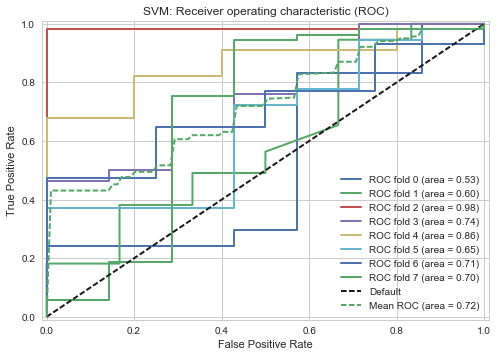

In [40]:
(fbeta_train, fbeta_test, accuracy_train, accuracy_test, feature_names) = cross_validation(processed_fuji_data, 8, 'SVM', 1000)

confusion matrix:
[[ 0  7]
 [ 7 47]]
confusion matrix:
[[ 0  6]
 [ 4 51]]
confusion matrix:
[[ 0  1]
 [ 7 53]]
confusion matrix:
[[ 2  5]
 [ 2 52]]
confusion matrix:
[[ 2  3]
 [ 4 52]]
confusion matrix:
[[ 0  7]
 [ 5 49]]
confusion matrix:
[[ 2  2]
 [ 9 48]]
confusion matrix:
[[ 0  7]
 [ 6 47]]


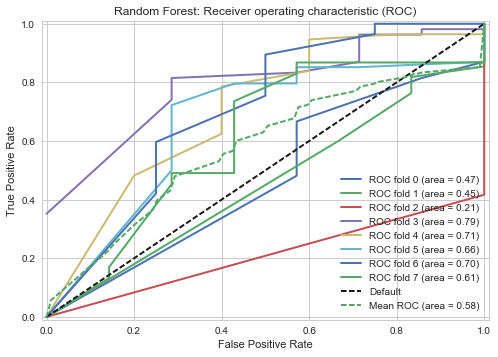

In [41]:
(fbeta_train, fbeta_test, accuracy_train, accuracy_test, feature_names) = cross_validation(processed_fuji_data, 8, 'Random Forest', 1000, 10)

confusion matrix:
[[ 1  6]
 [ 0 54]]
confusion matrix:
[[ 0  6]
 [ 2 53]]
confusion matrix:
[[ 0  1]
 [ 0 60]]
confusion matrix:
[[ 1  6]
 [ 1 53]]
confusion matrix:
[[ 2  3]
 [ 4 52]]
confusion matrix:
[[ 4  3]
 [ 4 50]]
confusion matrix:
[[ 1  3]
 [ 2 55]]
confusion matrix:
[[ 3  4]
 [ 2 51]]


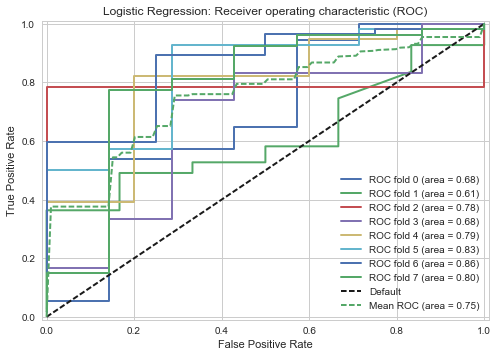

In [42]:
(fbeta_train, fbeta_test, accuracy_train, accuracy_test, feature_names) = cross_validation(processed_fuji_data, 8, 'Logistic Regression', 1000)

In [ ]:
# Random Forest
num_features = 1000
for num_forest in range(5, 50, 5):
    (fbeta_train, fbeta_test, accuracy_train, accuracy_test, feature_names) = cross_validation(processed_fuji_data, 8, 'Random Forest', num_features, num_forest)
    print 'Forest#:', num_forest, '| Fbeta Score:', fbeta_train, fbeta_test, '| Accuracy Score:', accuracy_train, accuracy_test

Since the accuracy doesn't change much, we choose number of forest = 10 for simplicity purpose.

In [ ]:
# SVM
for num_features in range(100, 1001, 100):
    (fbeta_train, fbeta_test, accuracy_train, accuracy_test, feature_names) = cross_validation(processed_fuji_data, 8, 'SVM', num_features)
    print 'Features:', num_features, '| Fbeta Score:', fbeta_train, fbeta_test, '| Accuracy Score:', accuracy_train, accuracy_test

In [ ]:
len(feature_names)

In [ ]:
# Logistic Regression
for num_features in range(100, 800, 100):
    score = cross_validation(processed_fuji_data, 8, 'Logistic Regression', num_features)
    print 'Num Features:', num_features, '| Fbeta Score:', np.mean(score)

## Result

### SVM Classifier Parameter Tuning

We estimate the best parameters for the SVM classifier by experimenting with different kernel types and regularization term.

In [ ]:
from sklearn import svm

# Train the classifiers
for kernel in ['rbf', 'linear', 'sigmoid', 'poly']:
    for C in [1e2, 1e3, 1e4, 1e5]:
        clf_svm = svm.SVC(kernel=kernel, C=C)
        clf_svm.fit(tfidf, processed_fuji_data.LABEL)
        print kernel, C, clf_svm.score(tfidf, list(processed_fuji_data.LABEL))

Based on the above results, the best kernel type is rbf and the best C is 1e4.

## Recommandations for Future Work

## References

1. http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py
2. http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py